## Data Import from Website

The required packages are
- Obspy: for working with earthquake seimsic data
- Basemap or Cartopy: for plotting maps

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.taup import TauPyModel
from obspy.geodetics import gps2dist_azimuth, kilometer2degrees

9703 Event(s) in Catalog:
2018-04-05T20:39:41.010000Z | +35.519, -120.079 | 2.61 Md | manual
2018-04-05T20:22:41.350000Z | +35.526, -120.070 | 2.93 Ml | manual
...
2000-01-04T13:48:09.980000Z | +36.642, -121.257 | 2.71 Md | manual
2000-01-02T18:35:47.120000Z | +36.046, -119.933 | 2.15 Md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'


C:\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


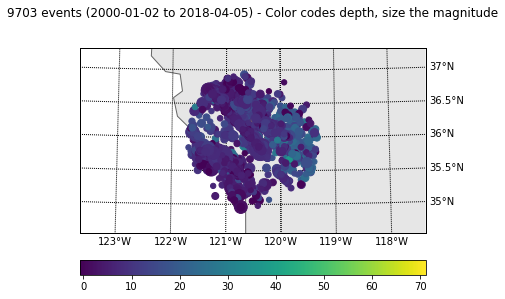

In [2]:
# define station and other parameters
networkName      = "BK"
stationName      = "PKD"
clientName       = "NCEDC"
starttime        = UTCDateTime("2000-01-01")
endtime          = UTCDateTime("2018-04-06")
maxRadius        = 1
minMagnitude     = 2
channelName      = "LHZ"

client = Client(clientName)
inventory = client.get_stations(network=networkName, station=stationName)
station = inventory[0][0]
cat = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=minMagnitude, latitude=station.latitude, longitude=station.longitude, maxradius=maxRadius)

print(cat)  
cat.plot(projection="local");

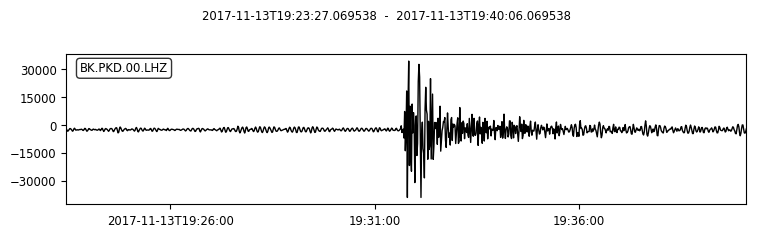

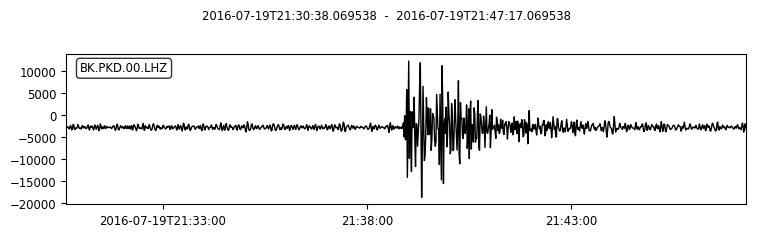

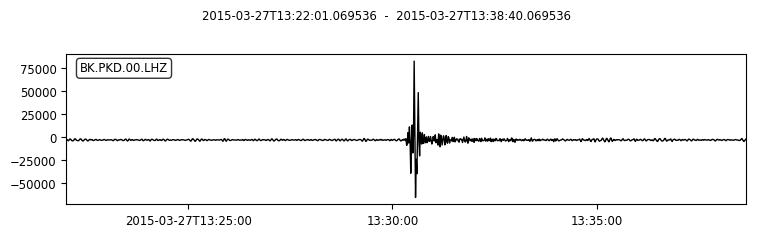

In [33]:
model = TauPyModel(model="iasp91")
nEvents = len(cat)
for i in range(0, 3):
    try:
        event = cat[i]
        origin = event.origins[0]
        distance, _, _ = gps2dist_azimuth(origin.latitude, origin.longitude, station.latitude, station.longitude)
        distance = kilometer2degrees(distance / 1e3)
        arrivals = model.get_travel_times(origin.depth / 1e3, distance)
        #print(arrivals)
        traveltime = arrivals[0].time
        arrival_time = origin.time + traveltime
        st = client.get_waveforms(network=networkName, station=stationName, location="00", channel=channelName, starttime=arrival_time-500, endtime=arrival_time+500)
        st.plot()
    except:
        pass

### Extracting raw data from previous trace

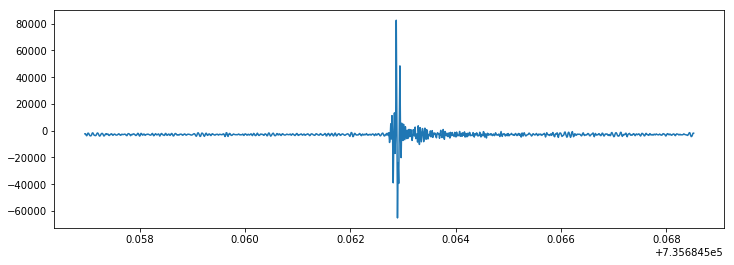

In [34]:
st = st.pop()
x = st.times('matplotlib')
y = st.data
fig = plt.figure(figsize=(12, 4))
plt.plot(x, y, '-')
